<a href="https://colab.research.google.com/github/etappau/ProjectTerm/blob/master/Assignment_1_stockprice_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

Data

In [0]:
data = pd.read_csv('all_stocks_5yr.csv')

In [46]:
data.set_index('date', inplace=True)
data.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## Get a feel of how many companies  stock are listed in the data

In [47]:
data.Name.unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [0]:
Amazon = data.loc[data['Name'] == 'AMZN']

In [50]:
Amazon.shape

(1259, 6)

In [0]:
Amazon = Amazon.drop(['Name'], axis=1)

# Earliest stock price

In [52]:
Amazon.head()

,open,high,low,close,volume
date,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078
2013-02-11,263.20,263.25,256.600,257.21,3403403
2013-02-12,259.19,260.16,257.000,258.70,2938660
2013-02-13,261.53,269.96,260.300,269.47,5292996
2013-02-14,267.37,270.65,265.400,269.24,3462780


## Most recent stock price

In [53]:
Amazon.tail()

,open,high,low,close,volume
date,,,,,
2018-02-01,1445.00,1459.88,1385.14,1390.00,9113808
2018-02-02,1477.39,1498.00,1414.00,1429.95,11125722
2018-02-05,1402.62,1458.98,1320.72,1390.00,11494985
2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819
2018-02-07,1449.00,1460.99,1415.15,1416.78,7162741


## Trading volume = how much interest people have in the stock, either to buy or to sell

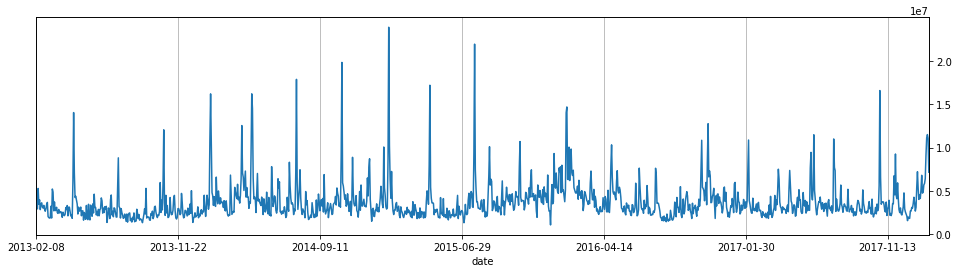

In [54]:
Amazon.volume.plot(figsize=(16,4), secondary_y=True, grid=True)

Text(0.5, 1.0, 'Trading volume')

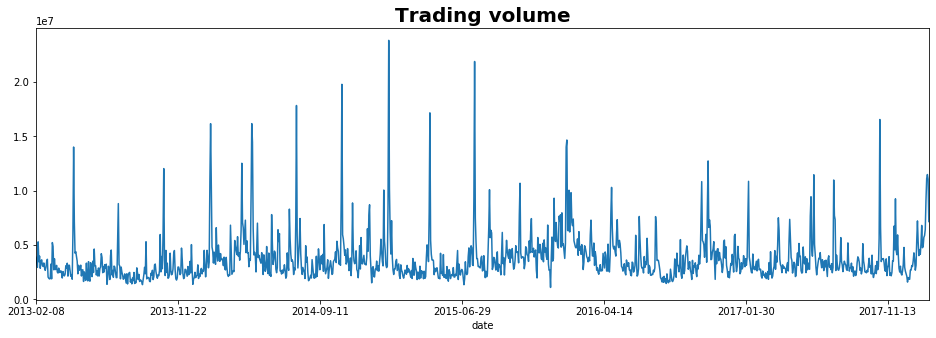

In [55]:
fig = plt.figure(figsize = (16,5))
Amazon.volume.plot()
plt.title("Trading volume", fontdict={'fontsize': 20, 'fontweight': 'bold'})

## It is interesting to see when the maximum of trading price and volume took place.

In [56]:
Amazon.idxmax()

open      2018-02-02
high      2018-02-02
low       2018-01-31
close     2018-01-31
volume    2015-01-30
dtype: object

In [57]:
Amazon.idxmin()

open      2013-05-02
high      2013-05-02
low       2013-05-01
close     2013-05-01
volume    2015-12-24
dtype: object

## Create a line plot showing close price for the entire index of time

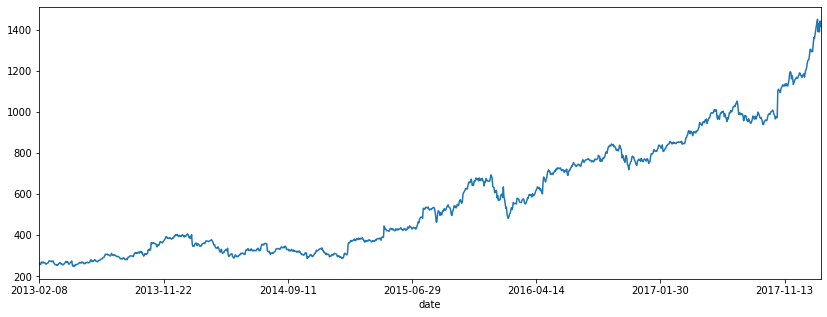

In [58]:
Amazon.xs(key='close',axis=1).plot(figsize=(14,5))

## Plotting rolling 30 day average against the Close Price stock for the year 2018

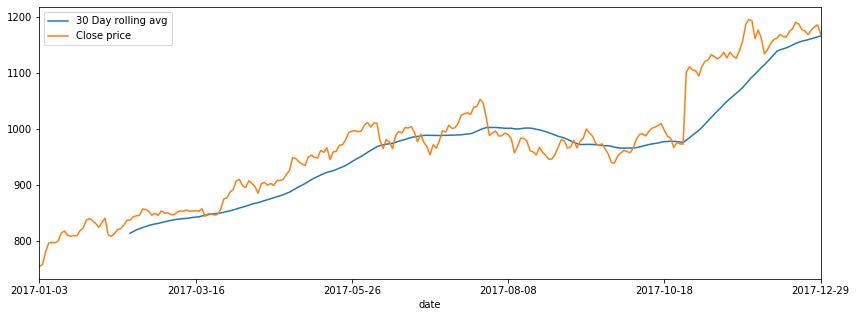

In [59]:
plt.figure(figsize=(14,5))
Amazon['close'].loc['2017-01-01':'2017-12-31'].rolling(window=30).mean().plot(label='30 Day rolling avg')
Amazon['close'].loc['2017-01-01':'2017-12-31'].plot(label='Close price')
plt.legend()

## Comparing with other prominent companies same timeframe

In [0]:
Microsoft = data.loc[data['Name'] == 'MSFT']
Microsoft = Microsoft.drop(['Name'], axis=1)
Apple = data.loc[data['Name'] == 'AAPL']
Apple = Apple.drop(['Name'], axis=1)
Google = data.loc[data['Name'] == 'GOOG']
Google = Google.drop(['Name'], axis=1)

DataFrame consisting of the closing price of these stocks is created, first by making a list of these objects and using the join method


In [68]:
stocks = pd.DataFrame({"AAPL": Apple["close"],
                      "MSFT": Microsoft["close"],
                      "AMZN": Amazon["close"],
                      "GOOG": Google["close"]})
 
stocks.tail()

,AAPL,MSFT,AMZN,GOOG
2018-02-01,167.78,94.26,1390.00,1167.70
2018-02-02,160.50,91.78,1429.95,1111.90
2018-02-05,156.49,88.00,1390.00,1055.80
2018-02-06,163.03,91.33,1442.84,1080.60
2018-02-07,159.54,89.61,1416.78,1048.58


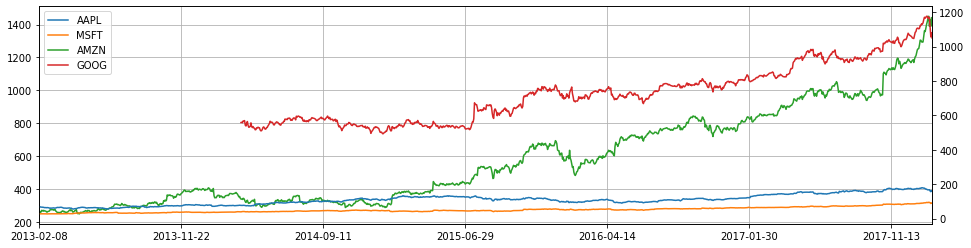

In [72]:
stocks.plot(figsize=(16,4), secondary_y = ["AAPL", "MSFT", "GOOG"], mark_right=False, grid = True,)